In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip -qq "/content/gdrive/MyDrive/archive.zip"

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
vc = data['Class'].value_counts().to_frame().reset_index()

In [ ]:
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


In [ ]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

In [ ]:
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177464,10.218333,-0.104941,0.751601,0.225560,-0.748639,1.099622,0.395713,0.791145,0.200272,-0.169629,...,-0.161553,-0.137934,0.155450,-0.948801,-0.700699,0.231562,0.305686,0.088287,0.89,0
231777,16.811389,-0.122409,1.149425,-2.611468,-0.618719,0.680058,-0.544380,2.006136,-0.079991,-0.641383,...,0.169556,0.358125,0.024278,-0.096492,-0.340016,0.525329,-0.151007,-0.020035,209.99,0
210722,14.360556,1.938091,0.089758,-1.238035,0.986414,-0.351128,-1.755183,0.193077,-0.359134,0.540036,...,0.138019,0.565442,0.142189,0.819158,-0.047255,0.403121,-0.043031,-0.026416,22.80,0
139729,23.143333,-0.839001,0.897658,2.142027,-0.596557,0.988985,0.511371,1.573387,-1.441615,0.897911,...,0.109986,1.241138,-0.415167,-0.241730,-0.744454,0.075347,-2.385094,-1.713441,10.61,0
27056,9.546389,-1.046114,1.405435,0.212857,0.400113,0.484588,0.554874,0.134874,0.698825,-0.462015,...,0.118157,0.383796,-0.171989,-1.169311,-0.103967,-0.232531,0.278012,0.189607,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215218,14.882778,2.030266,0.270468,-1.528897,1.366130,0.479973,-1.058662,0.643861,-0.435881,0.130553,...,0.018640,0.313453,0.014571,-0.066154,0.431428,-0.533652,-0.006185,-0.059047,8.00,0
9480,3.904444,-0.883915,0.626987,0.066830,-0.454323,2.977583,3.573006,-0.000974,-0.246982,0.957364,...,0.349629,-0.999722,0.428910,0.873347,-0.315289,-0.780460,-0.006177,-0.131398,9.99,0
14703,7.202222,1.127839,0.484605,0.724120,2.441885,-0.114231,-0.086099,-0.001373,0.083896,-0.611902,...,-0.227220,-0.755422,0.177897,-0.013374,0.144517,-0.233541,0.002908,0.024594,10.24,0
70134,14.923333,-1.542715,-0.215242,0.471353,-1.144273,-1.647514,0.372759,1.524489,0.282736,0.490575,...,-0.018600,0.248013,0.715797,0.227350,-0.165649,-0.892015,0.172093,-0.054318,372.00,0


In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.112778,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,0.131111,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,1.239444,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,1.940556,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,2.088611,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,22.983889,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,23.040833,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,23.041944,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,23.212778,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)

<ipython-input-15-cbe67a324f4b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,12.478333,-0.469678,0.664138,-0.454818,-0.088011,0.171895,0.377215,2.261368,-0.807091,0.607520,...,-0.365171,-0.201331,-0.015075,0.305929,-0.564569,-0.074338,-0.290249,-0.329507,253.92,0
1,17.526389,0.970482,-0.847493,0.595211,0.567191,-0.826490,0.599934,-0.596635,0.183025,-0.931399,...,-0.232898,-0.343392,-0.126469,-0.317010,0.353549,-0.319808,0.060416,0.042538,145.42,0
2,14.643611,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
3,8.545278,1.502916,-0.410908,0.010381,-0.998518,-0.360623,-0.212083,-0.519417,-0.153563,-0.803499,...,-0.178176,-0.581688,-0.050204,-1.005451,0.449193,-0.396493,0.014454,0.010673,10.00,0
4,16.180833,-1.053308,0.588041,0.497243,0.514123,-0.243353,-1.143231,0.516954,0.188210,-0.619711,...,0.128897,0.083167,0.014889,0.415131,-0.413715,0.457807,-0.151270,0.062739,72.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,9.971944,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,-5.015491,...,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,1.00,1
1488,8.938333,2.223486,-1.500806,-0.644077,-1.797258,-1.130154,0.272245,-1.483661,0.105621,-1.294010,...,-0.366698,-0.651640,0.420002,0.164178,-0.563207,-0.507434,0.032472,-0.039083,29.95,0
1489,14.829167,1.237815,-0.935983,1.018725,-0.713004,-1.546940,-0.094951,-1.297113,0.302919,-0.408348,...,0.464792,1.167640,-0.054946,0.219666,0.230063,-0.045473,0.035535,0.013620,29.95,0
1490,23.041944,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [ ]:
#이 코드는 pandas 데이터프레임에서 'Class' 열을 제외한 모든 열을 numpy 배열로 추출하는 코드
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [ ]:
X

array([[ 1.24783333e+01, -4.69678467e-01,  6.64138028e-01, ...,
        -2.90249217e-01, -3.29506840e-01,  2.53920000e+02],
       [ 1.75263889e+01,  9.70481912e-01, -8.47492750e-01, ...,
         6.04162068e-02,  4.25376526e-02,  1.45420000e+02],
       [ 1.46436111e+01, -3.97593926e+00, -1.24493887e+00, ...,
         8.77423851e-01,  6.67568430e-01,  8.30000000e+00],
       ...,
       [ 1.48291667e+01,  1.23781545e+00, -9.35982632e-01, ...,
         3.55347752e-02,  1.36201938e-02,  2.99500000e+01],
       [ 2.30419444e+01, -6.76142671e-01,  1.12636606e+00, ...,
         3.85107449e-01,  1.94361479e-01,  7.78900000e+01],
       [ 1.30361111e+01,  2.09212691e+00, -1.22863088e-02, ...,
        -1.50543753e-01, -1.00051523e-01,  1.00000000e+01]])

In [ ]:
Y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:

tsne = TSNE(n_components=2, random_state=0)
X_t = tsne.fit_transform(X)


In [ ]:
type(Y)

numpy.ndarray

In [ ]:
X_t

array([[ 43.503666 ,  -4.6042624],
       [ 40.92311  ,  16.751501 ],
       [-23.566765 ,  15.549263 ],
       ...,
       [  3.6441357,  -1.8716959],
       [ 19.934618 ,  26.58506  ],
       [-13.57456  , -16.031382 ]], dtype=float32)

In [ ]:
X_t[np.where(Y == 0), 0]

array([[ 4.35036659e+01,  4.09231110e+01, -1.69339619e+01,
         1.69596615e+01,  3.06804962e+01,  5.09246445e+00,
         4.21698685e+01, -5.74377632e+00,  4.44379082e+01,
         6.48727465e+00,  3.92399597e+01,  4.49380760e+01,
        -9.62538815e+00, -1.71390038e+01, -2.32309761e+01,
        -1.03253984e+01,  2.97564030e+01, -1.74410057e+01,
         3.33035240e+01, -6.10815001e+00,  4.50629387e+01,
         7.28800488e+00,  2.55127945e+01, -6.71787882e+00,
         6.55926406e-01, -9.17580009e-01,  4.19320145e+01,
        -1.81522942e+01, -2.17701416e+01, -1.29046974e+01,
        -1.87134171e+01, -2.24420223e+01, -2.51590328e+01,
         4.15759754e+00, -1.42506809e+01,  3.80477753e+01,
         7.64423943e+00, -2.89838371e+01, -1.08176641e+01,
        -2.91717415e+01,  3.48999619e+00, -8.69385910e+00,
        -1.68915234e+01,  9.96712017e+00,  3.49763565e+01,
        -2.00098438e+01, -1.60072594e+01, -5.23456717e+00,
         3.15974579e+01, -1.79290047e+01, -2.01395917e+0

In [ ]:
X_t[np.where(Y == 0), 1]

array([[-4.60426235e+00,  1.67515011e+01, -9.21843624e+00,
         2.21194420e+01,  2.46393299e+01,  3.13335109e+00,
         1.44146910e+01, -7.42499924e+00,  4.48372507e+00,
        -3.81916857e+00, -1.49571724e+01,  5.93723583e+00,
        -2.65001297e+01, -3.19636517e+01, -1.45795555e+01,
        -2.42717228e+01,  2.51002636e+01, -2.23610458e+01,
        -2.31781483e+01, -2.11675167e+01,  3.24716949e+00,
         1.92174661e+00, -3.28141212e+01, -9.97609329e+00,
        -2.02198744e+00, -1.25105515e+01, -1.05700111e+01,
        -3.15046368e+01, -3.52552643e+01, -2.04580746e+01,
        -3.15519466e+01, -1.11227303e+01, -1.16711636e+01,
         5.42768335e+00, -1.35942211e+01, -1.69653473e+01,
         5.59769869e+00, -1.55486660e+01, -2.76026058e+01,
        -1.15711727e+01, -9.51617527e+00, -1.31278477e+01,
        -1.43448019e+01,  1.70769310e+01, -2.11154308e+01,
        -2.57076168e+01, -1.83941031e+00, -4.33824062e+00,
         2.46494236e+01, -1.17273223e+00, -9.12631321e+0

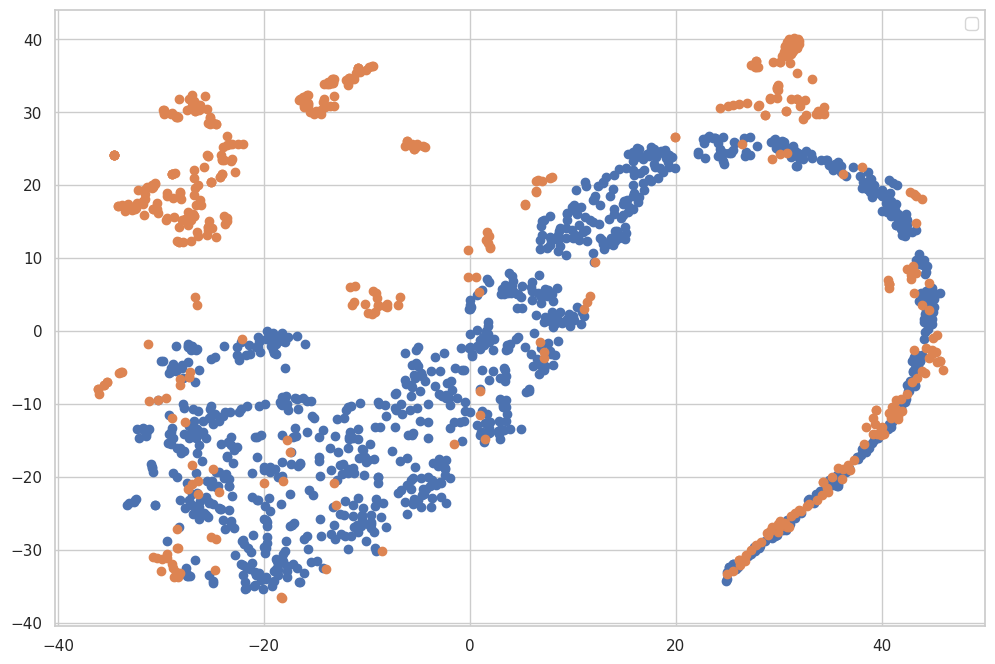

In [ ]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1])
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1])

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [ ]:
shape=X.shape

In [ ]:
shape

(1492, 30)

In [ ]:
X

array([[ 1.24783333e+01, -4.69678467e-01,  6.64138028e-01, ...,
        -2.90249217e-01, -3.29506840e-01,  2.53920000e+02],
       [ 1.75263889e+01,  9.70481912e-01, -8.47492750e-01, ...,
         6.04162068e-02,  4.25376526e-02,  1.45420000e+02],
       [ 1.46436111e+01, -3.97593926e+00, -1.24493887e+00, ...,
         8.77423851e-01,  6.67568430e-01,  8.30000000e+00],
       ...,
       [ 1.48291667e+01,  1.23781545e+00, -9.35982632e-01, ...,
         3.55347752e-02,  1.36201938e-02,  2.99500000e+01],
       [ 2.30419444e+01, -6.76142671e-01,  1.12636606e+00, ...,
         3.85107449e-01,  1.94361479e-01,  7.78900000e+01],
       [ 1.30361111e+01,  2.09212691e+00, -1.22863088e-02, ...,
        -1.50543753e-01, -1.00051523e-01,  1.00000000e+01]])

In [ ]:
shape

30

In [ ]:
#X.shape[1]은 바로 컬럼의 수를 의미한다.
#X.shape[0]은 바로 열의 수를 의미한다.
input_layer = Input(shape=(X.shape[1],))

In [ ]:
from keras.layers.serialization import activation
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50,activation='relu')(encoded)

In [ ]:
## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

In [ ]:
output_layer = Dense(X.shape[1], activation='relu')(decoded)

I am using "adadelta" as the optimizer and "mse" as the loss function.

In [ ]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss='mse')

In [ ]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

In [ ]:
#x.values는 DataFrame 혹은 Series를 numpy array 형식으로 변환
x.values

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 2.77777778e-04, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 2.39966667e+01,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 2.39966667e+01, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 2.39977778e+01, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)

In [ ]:
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [ ]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 [==============================] - 3s 53ms/step - loss: 0.2395 - val_loss: 0.2389
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2392 - val_loss: 0.2386
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2389 - val_loss: 0.2383
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2386 - val_loss: 0.2380
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2383 - val_loss: 0.2377
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2380 - val_loss: 0.2374
Epoch 7/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2377 - val_loss: 0.2371
Epoch 8/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2374 - val_loss: 0.2368
Epoch 9/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2371 - val_loss: 0.2365
Epoch 10/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2368 - val_loss: 0.2362


In [ ]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [ ]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

16/16 [==============================] - 0s 7ms/step


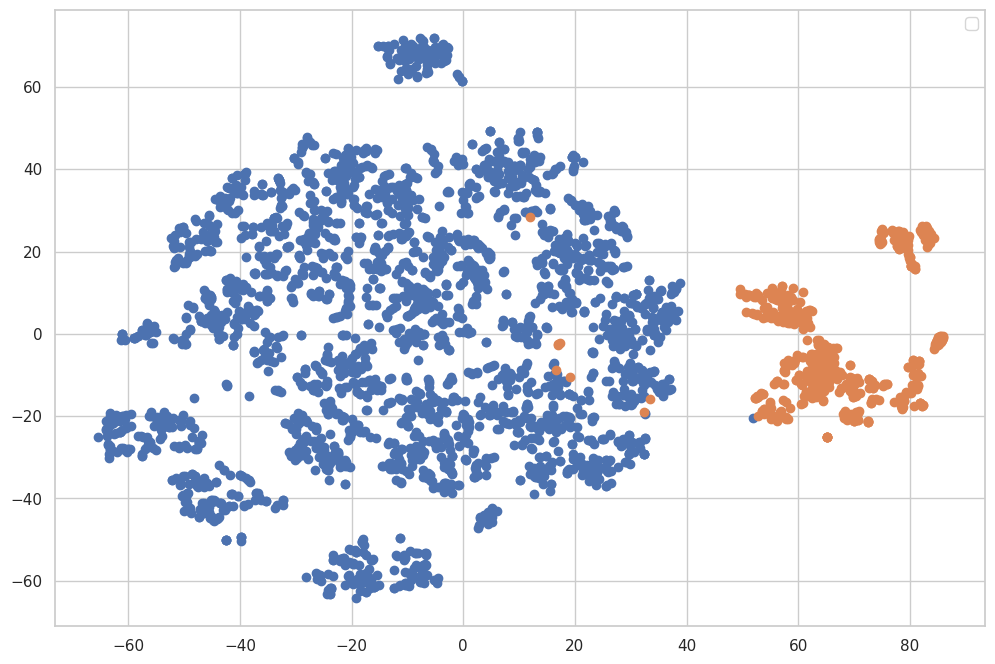

In [ ]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       742
         1.0       1.00      0.91      0.95       131

    accuracy                           0.99       873
   macro avg       0.99      0.95      0.97       873
weighted avg       0.99      0.99      0.99       873


Accuracy Score:  0.9862542955326461
